In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
housing = pd.DataFrame(boston.data, columns=boston.feature_names)

In [13]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

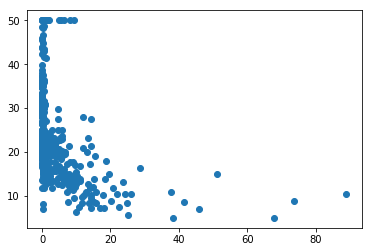

In [14]:
plt.scatter(housing['CRIM'], boston.target)

In [35]:
lr = LinearRegression()

In [36]:
X = housing['CRIM'].values.reshape(-1,1)
y = boston.target

In [37]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lr.predict(20)

array([15.7607261])

In [39]:
y1 = lr.predict(X)

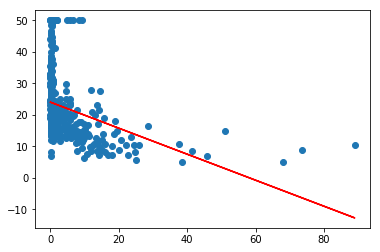

In [40]:
plt.scatter(X, y)
plt.plot(X, y1, color = 'red')

In [41]:
X = housing['LSTAT'].values.reshape(-1,1)

In [42]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr.predict(20)

array([15.5528538])

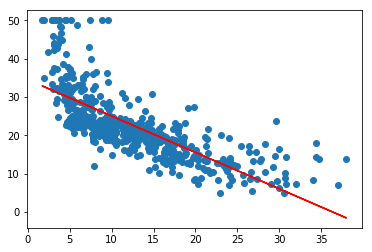

In [44]:
y2 = lr.predict(X)
plt.scatter(X, y)
plt.plot(X, y2, color = 'red')

In [45]:
sum(y2 - y)

4.193978497823991e-12

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y2, y)

38.48296722989414

In [48]:
mean_squared_error(y1, y)

71.85234666526337

In [49]:
X = boston.data
y = boston.target
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
big_predict = lr.predict(X)

In [51]:
mean_squared_error(big_predict, y)

21.897779217687496

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
X_train.shape

(379, 13)

In [55]:
X_test.shape

(127, 13)

In [56]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_squared_error(pred, y_test)

31.090049643404537

## YELP

In [57]:
yelp = pd.read_csv('yelp.csv')

In [58]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [59]:
yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [60]:
yelp.stars[0]

5

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cvec = CountVectorizer(stop_words = 'english', max_features=300)
cvec.fit_transform(yelp.text)

<10000x300 sparse matrix of type '<class 'numpy.int64'>'
	with 208014 stored elements in Compressed Sparse Row format>

In [83]:
yelp.iloc[9000]['text']

"The food...delicious. The atmosphere...relaxing. The service...pretty spot-on. The pricing...ehhh, not my thing here. The only way I was able to eat here was because a family friend treated my family out. But if you're looking to spoil yourself or anyone you know, with food, this is the place to do it. \n\nI ordered the Chicken Romano (pan-seared with a blend of romano cheese & panko breadcrumbs, with lemon shallot butter, tomatoes, asparagus & yukon gold mashed potatoes). The chicken pan-seared with bread crumbs was great to eat, crispy on the outside and juicy on the inside.The asparagus... I've had better, but the yukon gold mashed potatoes were silky, buttery and made perfectly. They went well with the chicken romano.\n\nMy dad ordered the NY Strip, and they were kind of enough to cut it up for him since he was handicapped. They checked up on us frequently. THE ONLY THING I WOULD COMPLAIN ABOUT WAS THEY ACTUALLY CAME UP AND ASKED IF I WAS DONE (ALREADY GRABBING AT MY PLATE) WHEN T

In [74]:
train = yelp.text[:9000]
test = yelp.text[9000:]

In [77]:
X = cvec.fit_transform(train)
y_train = yelp.stars[:9000]
y_test = yelp.stars[9000:]

In [79]:
lr = LinearRegression()
lr.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
lr.predict(cvec.fit_transform(test))

array([2.99215275, 4.02441806, 3.83251131, 3.81871049, 3.75402324,
       2.31427833, 3.22815079, 4.87560016, 2.73971106, 4.37522649,
       2.41262625, 4.00979108, 3.75936748, 3.98213272, 3.74246814,
       2.79189531, 3.95739191, 4.59997881, 3.59200723, 4.00625973,
       3.94811389, 3.70971437, 3.69683292, 3.8298689 , 4.74218584,
       4.35454308, 4.07256449, 4.31835231, 4.03545573, 3.50500093,
       4.21730452, 3.595915  , 3.80367046, 3.93533187, 3.71834773,
       3.82973386, 3.15591325, 4.62095872, 3.78548423, 3.68449607,
       3.82039516, 3.05555054, 3.07725667, 3.5296599 , 1.1253127 ,
       3.47512586, 3.80375879, 4.09146449, 3.98477619, 3.69311833,
       3.83624086, 3.4705323 , 3.69757275, 3.98970695, 3.61952996,
       4.86870207, 3.37993879, 3.75329655, 3.1964814 , 3.28460096,
       4.1512947 , 4.60714131, 4.1954835 , 3.12174455, 3.98374758,
       2.83754095, 3.55012496, 3.3651354 , 3.79525731, 3.90791581,
       3.74963377, 4.04715788, 4.25304434, 3.9367044 , 4.34406